In [35]:
import pickle

# Load entrenamiento.p
with open('./data/entrenamiento.p', 'rb') as file:
    entrenamiento_data = pickle.load(file)

# Load prueba.p
with open('./data/prueba.p', 'rb') as file:
    prueba_data = pickle.load(file)

# Load validacion.p
with open('./data/validacion.p', 'rb') as file:
    validacion_data = pickle.load(file)

In [36]:
import numpy as np
from PIL import Image
def preprocess_image(image_array, target_size=(32, 32)):
    image = Image.fromarray(image_array)
    image = image.convert('L')  # Convert to grayscale
    image = image.resize(target_size)  # Resize to target size
    image = np.array(image) / 255.0  # Normalize pixel values
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    return image

In [37]:
all_images = np.concatenate((entrenamiento_data['features'], prueba_data['features'], validacion_data['features']), axis=0)

preprocessed_images = [preprocess_image(image) for image in all_images]


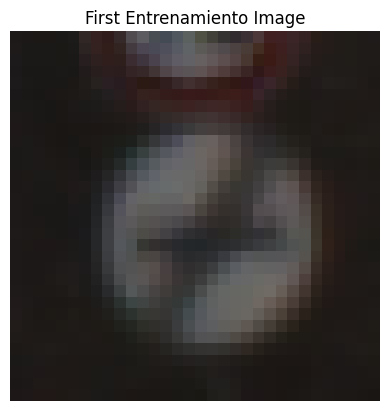

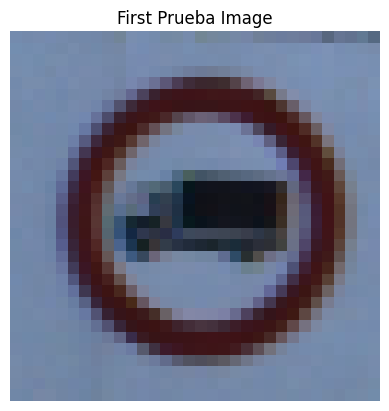

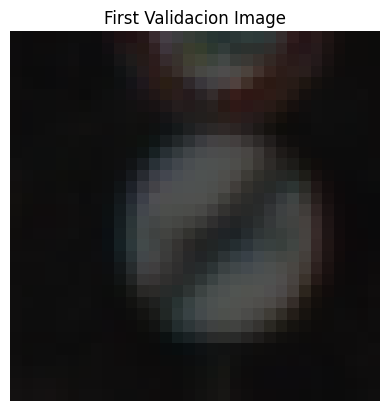

In [38]:
import matplotlib.pyplot as plt

def show_image(image, title):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Show the first image of each set
show_image(entrenamiento_data['features'][0], 'First Entrenamiento Image')
show_image(prueba_data['features'][0], 'First Prueba Image')
show_image(validacion_data['features'][0], 'First Validacion Image')

In [39]:
num_entrenamiento = len(entrenamiento_data['features'])
num_prueba = len(prueba_data['features'])
num_validacion = len(validacion_data['features'])

entrenamiento_data['features'] = preprocessed_images[:num_entrenamiento]
prueba_data['features'] = preprocessed_images[num_entrenamiento:num_entrenamiento + num_prueba]
validacion_data['features'] = preprocessed_images[num_entrenamiento + num_prueba:]

print(f"Shape of first entrenamiento image: {entrenamiento_data['features'][0].shape}")
print(f"Shape of first prueba image: {prueba_data['features'][0].shape}")
print(f"Shape of first validacion image: {validacion_data['features'][0].shape}")

Shape of first entrenamiento image: (32, 32, 1)
Shape of first prueba image: (32, 32, 1)
Shape of first validacion image: (32, 32, 1)


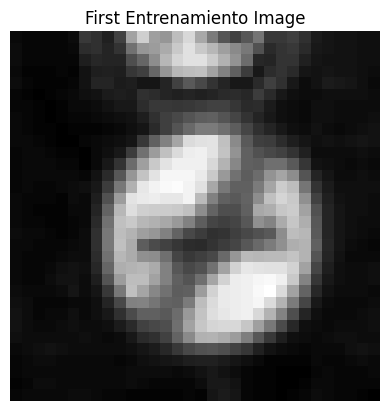

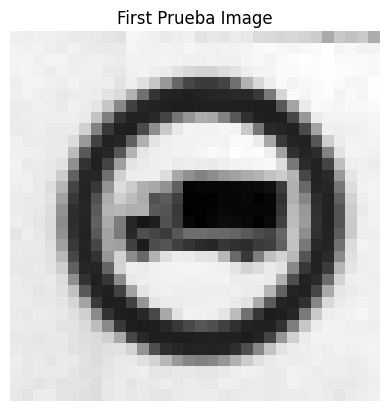

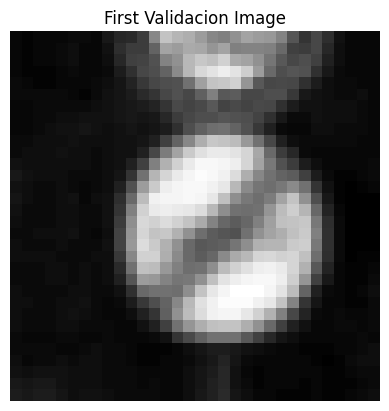

In [40]:
show_image(entrenamiento_data['features'][0], 'First Entrenamiento Image')
show_image(prueba_data['features'][0], 'First Prueba Image')
show_image(validacion_data['features'][0], 'First Validacion Image')